In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import shap

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/SMAMHTN/Final-Project-Microcredential/main/Pengerjaan/indeks-standar-pencemar-udara-di-spku-bulan-januari-juli-2021.csv")

In [ ]:
data = data.drop(columns=['tanggal','stasiun','max','critical'],axis=1)

In [ ]:
data

,pm10,pm25,so2,co,o3,no2,categori
0,38.0,53.0,29.0,6.0,31.0,13.0,SEDANG
1,27.0,46.0,27.0,7.0,47.0,7.0,BAIK
2,44.0,58.0,25.0,7.0,40.0,13.0,SEDANG
3,30.0,48.0,24.0,4.0,32.0,7.0,BAIK
4,38.0,53.0,24.0,6.0,31.0,9.0,SEDANG
...,...,...,...,...,...,...,...
1055,64.0,110.0,32.0,13.0,29.0,35.0,TIDAK SEHAT
1056,70.0,130.0,33.0,17.0,28.0,45.0,TIDAK SEHAT
1057,78.0,140.0,32.0,18.0,29.0,39.0,TIDAK SEHAT
1058,75.0,121.0,37.0,12.0,50.0,21.0,TIDAK SEHAT


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      902 non-null    float64
 1   pm25      902 non-null    float64
 2   so2       902 non-null    float64
 3   co        902 non-null    float64
 4   o3        902 non-null    float64
 5   no2       902 non-null    float64
 6   categori  902 non-null    object 
dtypes: float64(6), object(1)
memory usage: 56.4+ KB


<BarContainer object of 3 artists>

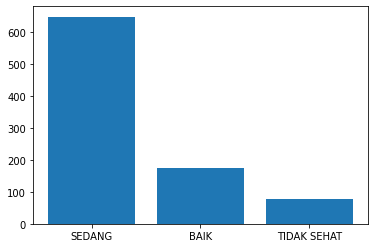

In [ ]:
plt.bar(data.categori.unique(),height=data.categori.value_counts())

In [ ]:
data.isnull().sum()

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      902 non-null    float64
 1   pm25      902 non-null    float64
 2   so2       902 non-null    float64
 3   co        902 non-null    float64
 4   o3        902 non-null    float64
 5   no2       902 non-null    float64
 6   categori  902 non-null    object 
dtypes: float64(6), object(1)
memory usage: 56.4+ KB


## Preprocessing

In [ ]:
def preprocessing_inputs(df):
  df = df.copy()
  #split train test
  y = df['categori']
  X = df.drop('categori',axis=1)
  #train test split
  X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True,random_state=1)
  return X_train,X_test,y_train,y_test



In [ ]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

## Training

In [ ]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
acc = model.score(X_test,y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 99.26%


## Predicting

In [ ]:
predicting= np.reshape((120,99,34,55,19,55),(1,-1))
predicting

array([[120,  99,  34,  55,  19,  55]])

# Feature Impact


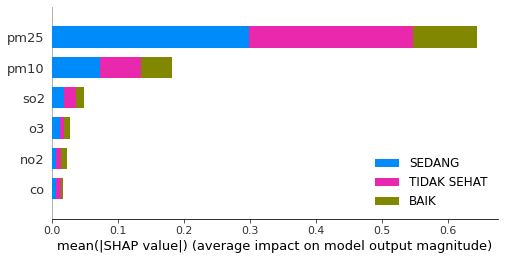

In [ ]:
explainer = shap.TreeExplainer(model)
explainer_values = explainer.shap_values(X_test)
shap.summary_plot(explainer_values,X_test,class_names=model.classes_)


In [ ]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train.drop(columns=['so2','o3','no2','co'],axis=1),y_train)
acc = model.score(X_test.drop(columns=['so2','o3','no2','co'],axis=1),y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 98.15%


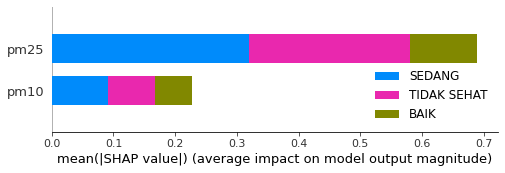

In [ ]:
explainer = shap.TreeExplainer(model)
explainer_values = explainer.shap_values(X_test.drop(columns=['so2','o3','no2','co'],axis=1))
shap.summary_plot(explainer_values,X_test.drop(columns=['so2','o3','no2','co'],axis=1),class_names=model.classes_)